# Assignment Two  
## Topic : Electricity Demand Forecasting  
**Group Member**  
Zhipeng Liu 12764268  
Qingyuan Li 13016389

# Code Space

## Import Dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import Series
from google.colab import files
import warnings
import glob
%matplotlib inline

In [0]:
path = r'/content/drive/My Drive/RP/Data'
all_files = glob.glob(path + "/*.csv")

data_list = []
data_list19 = []

for filename in all_files:
    if '2018' in filename:
        df = pd.read_csv(filename, index_col = None, header=0)
        data_list.append(df)
    elif '2019' in filename:
        df19 = pd.read_csv(filename, index_col = None, header=0)
        data_list19.append(df19)
        
data_18 = pd.concat(data_list, axis = 0, ignore_index=True)
data_19 = pd.concat(data_list19, axis = 0, ignore_index=True)


In [0]:
print(f'About Dataset \
       \n data_18.shape > sample_size, attribute_size : {data_18.shape}\
       \n data_19.shape > sample_size, attribute_size : {data_19.shape}\
       \n data.columns  : {data_18.columns}\
       \n data.types    : {data_19.dtypes}')

About Dataset        
 data_18.shape > sample_size, attribute_size : (17520, 5)       
 data_19.shape > sample_size, attribute_size : (8688, 5)       
 data.columns  : Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'RRP', 'PERIODTYPE'], dtype='object')       
 data.types    : REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object


In [0]:
print(f'Time period \
        \n data_18 : {data_18.SETTLEMENTDATE.min()}, {data_18.SETTLEMENTDATE.max()}\
        \n data_19 : {data_19.SETTLEMENTDATE.min()}, {data_19.SETTLEMENTDATE.max()}')

Time period         
 data_18 : 2018/01/01 00:30:00, 2019/01/01 00:00:00        
 data_19 : 2019/01/01 00:30:00, 2019/07/01 00:00:00


In [0]:
data_18.head(3)

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2018/05/01 00:30:00,7398.98,60.97,TRADE
1,NSW1,2018/05/01 01:00:00,7200.89,62.62,TRADE
2,NSW1,2018/05/01 01:30:00,7000.87,57.97,TRADE


In [0]:
data_18.drop(['REGION','RRP','PERIODTYPE'], axis=1, inplace=True)
data_19.drop(['REGION','RRP','PERIODTYPE'], axis=1, inplace=True)

In [0]:
data_18['SETTLEMENTDATE'] = pd.to_datetime(data_18.SETTLEMENTDATE)
data_19['SETTLEMENTDATE'] = pd.to_datetime(data_19.SETTLEMENTDATE)

data_18 = data_18.set_index(['SETTLEMENTDATE'], drop=True).sort_index()
data_19 = data_19.set_index(['SETTLEMENTDATE'], drop=True).sort_index()

In [0]:
data_18.head(3)

,TOTALDEMAND
SETTLEMENTDATE,
2018-01-01 00:30:00,6912.25
2018-01-01 01:00:00,6745.63
2018-01-01 01:30:00,6466.06


In [0]:
data_18.info() , data_19.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2018-01-01 00:30:00 to 2019-01-01 00:00:00
Data columns (total 1 columns):
TOTALDEMAND    17520 non-null float64
dtypes: float64(1)
memory usage: 273.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8688 entries, 2019-01-01 00:30:00 to 2019-07-01 00:00:00
Data columns (total 1 columns):
TOTALDEMAND    8688 non-null float64
dtypes: float64(1)
memory usage: 135.8 KB


(None, None)

In [0]:
ts = data_18
ts19 = data_19

ts = ts['TOTALDEMAND'].sort_index()
ts19 = ts19['TOTALDEMAND'].sort_index()

## Functions

In [0]:
def plot_trend(timeSeries, windowSize):
    original = timeSeries
    
    rolMean = original.rolling(window = windowSize).mean()
    rolStd = original.rolling(window= windowSize).std()
    #rolWeightMean = pd.ewma(original, span = windowSize)
    
    plt.figure(figsize=(10,5))
    originalPlot = plt.plot(original, color= 'blue', label = 'Original')
    rolMeanPlot = plt.plot(rolMean, color= 'green', label = 'Rolling Mean')
    #rolWeightMeanPlot = plt.plot(rolWeightMean, color ='yellow', label = ' Weighted Rolling Mean')
    rolStdPlot = plt.plot(rolStd, color= 'red', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Original & Rolling Mean  & Standard Deviation')
    plt.show(block=False)
    print('Window Size :', windowSize )
    return rolMean, rolStd

In [0]:
def plot_ts(timeSeries):
    plt.figure(figsize=(10,5)) 
    plt.plot(timeSeries, label='Total Electricity Demand') 
    plt.title('Time Series') 
    plt.xlabel("Time(year-month)") 
    plt.ylabel("Total Electricity Demand") 

In [0]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeSeries):
    test = adfuller(timeSeries, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        results['Critical Value (%s)'%key] = value
    print (results)

In [0]:
import statsmodels.api as sm

def plot_acf_pacf(timeSeries, Lags):
    fig = plt.figure(figsize = (10,5))

    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeSeries, lags=Lags,ax=ax1)
    ax1.xaxis.set_ticks_position('bottom')
    fig.tight_layout()

    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeSeries, lags=Lags,ax=ax2)
    ax2.xaxis.set_ticks_position('bottom')
    fig.tight_layout()
    print("Lag : ",Lags)

In [0]:
def week_or_weekend_day(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
      return 1
    else:
      return 0
    

def create_Datetime(dataframe):
  
    dataframe['Datetime'] = pd.to_datetime(dataframe.SETTLEMENTDATE,format='%Y/%m/%d %H:%M:%S')
    dataframe['year'] = dataframe.Datetime.dt.year
    dataframe['month']=dataframe.Datetime.dt.month 
    dataframe['day']=dataframe.Datetime.dt.day
    dataframe['Hour']=dataframe.Datetime.dt.hour
    dataframe['Minute']=dataframe.Datetime.dt.minute
    
    dataframe['day of week'] = dataframe['Datetime'].dt.dayofweek
    dataframe.index = dataframe['Datetime']
    dataframe = dataframe.sort_index()
    
    temp = dataframe['Datetime'].apply(week_or_weekend_day)
    dataframe['weekend'] = temp
    
    
    
    
    dataframe = dataframe.drop(columns=['REGION', 'SETTLEMENTDATE','RRP', 'PERIODTYPE'])


## Statistical Model

### Moving Average

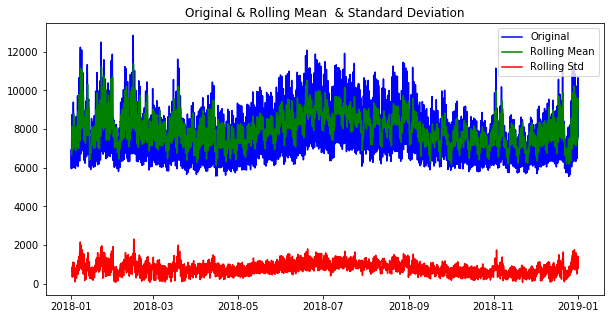

Window Size : 24


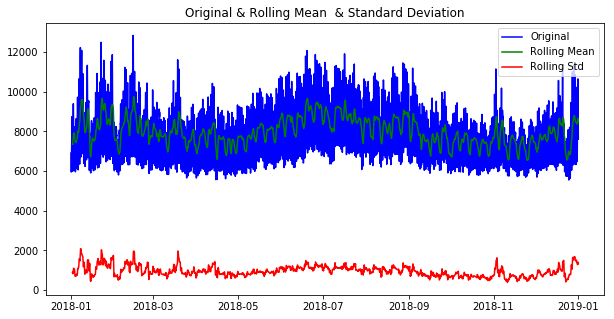

Window Size : 48


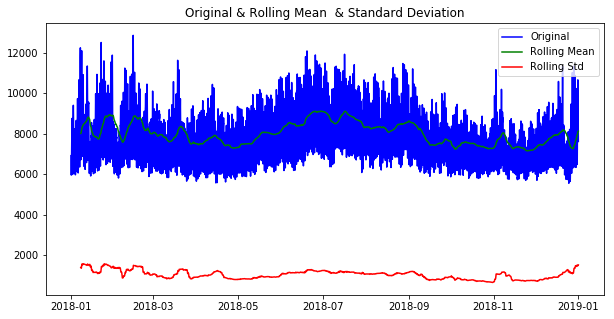

Window Size : 336


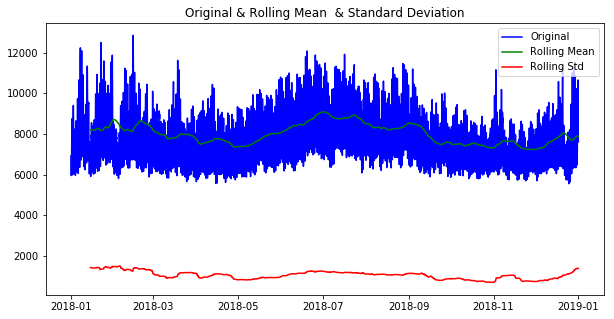

Window Size : 672


In [0]:
windowSizeList = [24, 48, 336, 672]
for i in windowSizeList:
    plot_trend(ts,i)

### Seasonality decomposition

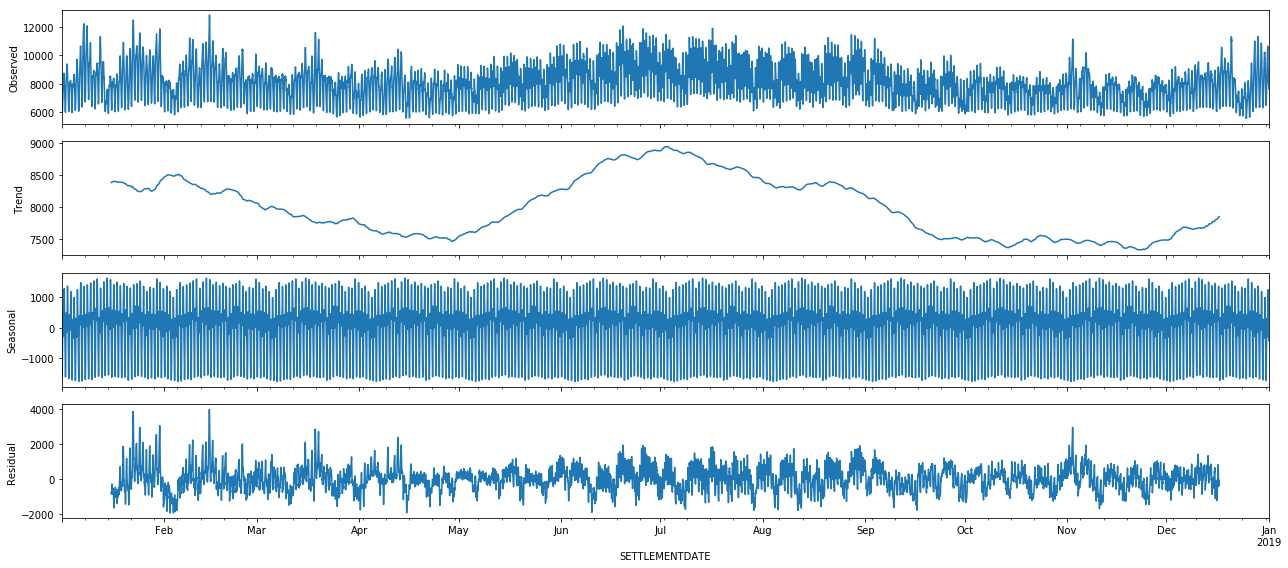

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

decomposition = seasonal_decompose(ts, model="additive", freq = 1440 )
fig = decomposition.plot()
plt.show()

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

### Test stationarity

H0 : TS is non-stat   
- Test_stat < CV  -> not reject  
- P-value < significance level -> reject

In [0]:
test_stationarity(ts)

Test Statistic                    -3.578170
p-value                            0.006192
#Lags Used                        44.000000
Number of Observations Used    17475.000000
Critical Value (1%)               -3.430724
Critical Value (5%)               -2.861705
Critical Value (10%)              -2.566858
dtype: float64


In [0]:
test_stationarity(ts19)

Test Statistic                   -4.266158
p-value                           0.000508
#Lags Used                       37.000000
Number of Observations Used    8650.000000
Critical Value (1%)              -3.431106
Critical Value (5%)              -2.861874
Critical Value (10%)             -2.566948
dtype: float64


### Select ACF and PACF value

Plan  
- the ARMA model is determined by two parameters (p and q)
- plot acf and pacf > find p and q value
- need to think about how to select Lags and how it influence our results

Lag :  24
Lag :  48
Lag :  96
Lag :  336


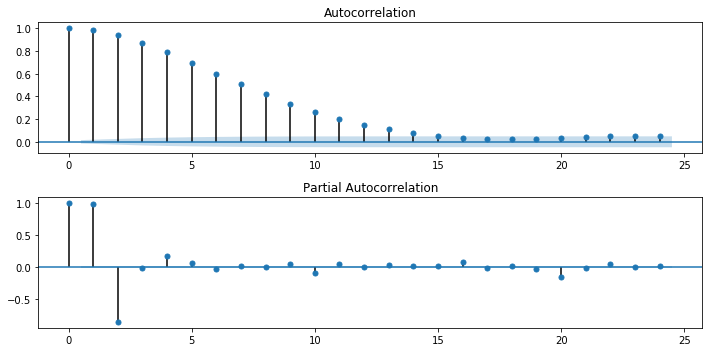

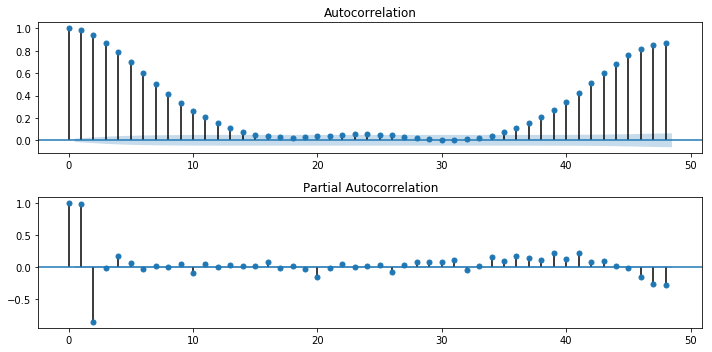

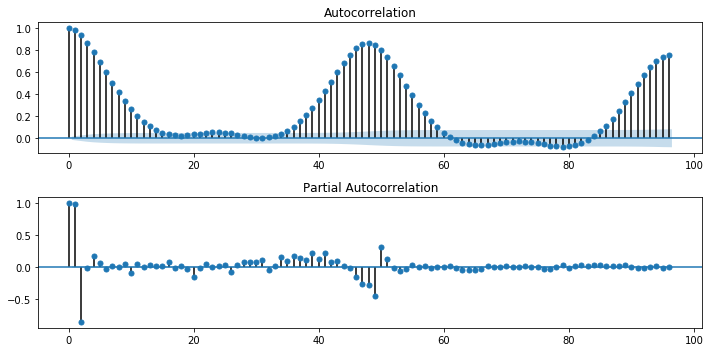

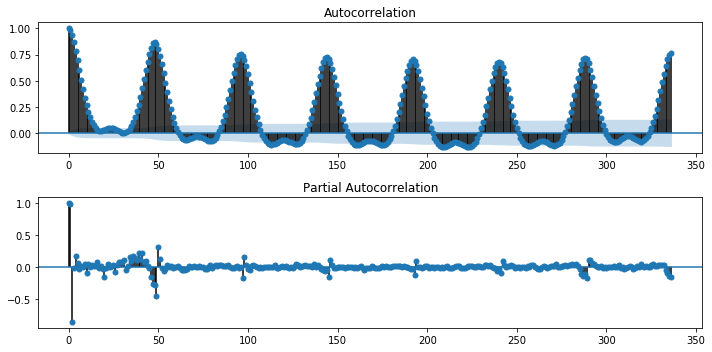

In [0]:
lagsList = [24, 48, 96, 336 ]
for x in lagsList: 
    plot_acf_pacf(ts,x)

### Build and fit model

In [0]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts, order=(15, 3)) 
result_arma = model.fit( disp=-1, method='css')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)


In [0]:
type(result_arma)
predict_ts = result_arma.predict()

# the value of p is 15 > so the model ignores the first 15 records in ts.
print(len(predict_ts))
print(len(ts))
predRecordIndex = predict_ts.index.intersection(ts.index)

17505
17520


RMSE :  109.71057289295781


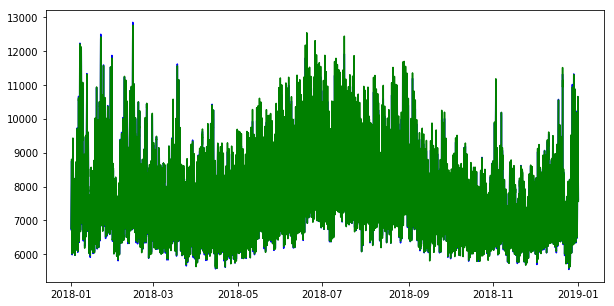

In [0]:
original_ts = ts[predRecordIndex]
plt.figure(figsize = (10, 5))

plt.plot(original_ts, color='blue')
plt.plot(predict_ts, color='green')
RMSE = np.sqrt(sum((original_ts.values - predict_ts.values)**2)/predict_ts.size)
print("RMSE : ", RMSE)

### Predict

In [0]:
print(result_arma.summary())

                              ARMA Model Results                              
Dep. Variable:            TOTALDEMAND   No. Observations:                17520
Model:                    ARMA(15, 3)   Log Likelihood             -107074.309
Method:                           css   S.D. of innovations            109.711
Date:                Wed, 25 Sep 2019   AIC                         214188.617
Time:                        11:03:40   BIC                         214344.022
Sample:                    01-01-2018   HQIC                        214239.791
                         - 01-01-2019                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7999.9313    119.853     66.748      0.000    7765.025    8234.838
ar.L1.TOTALDEMAND      1.3544      0.011    119.264      0.000       1.332       1.377
ar.L2.TOTALDEMAND   

In [0]:
# Using parts pf 2019's data to predict
from statsmodels.tsa.arima_model import ARMA
start = '2019-01-01 00:30:00'
end = '2019-03-14 22:30:00'

pred_result_19 = result_arma.predict(start, end)
out_of_sample = ts19[start:end]

len(pred_result_19),len(out_of_sample)

(3501, 3501)

RMSE :  1597.9483497583317


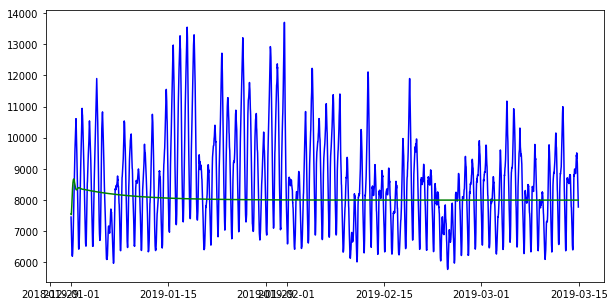

In [0]:
plt.figure(figsize = (10, 5))

plt.plot(out_of_sample, color='blue')
plt.plot(pred_result_19, color='green')
RMSE19 = np.sqrt(sum((out_of_sample.values - pred_result_19.values)**2)/pred_result_19.size)
print("RMSE : ", RMSE19)

Result  
- the predicted value is flat, maybe it caused by overfitting, the model is trained by 2018 dataset. 
- the two para (p, q) determine the performance.  
- **maybe the model result_arma() didn't get the 2019's data**

Solution  
- change para to observe results
- try to use 2019's data train the model
- observe para

## Machine Learning Models

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


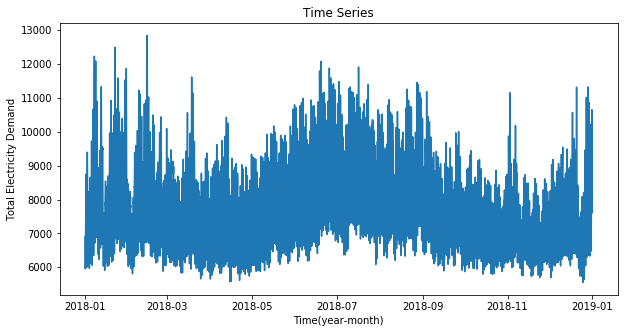

In [0]:
# Plot original data
plot_ts(data_18)

In [0]:
# Split data_19 into train and test
split_date = pd.Timestamp('2018-10-01 00:00:00')
split_date2 = pd.Timestamp('2018-10-01 00:30:00')

train = data_18.loc[:split_date]
test = data_18.loc[split_date2:]

<Figure size 720x360 with 0 Axes>

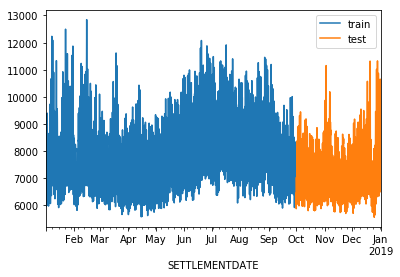

In [0]:
# Plot split data
plt.figure(figsize=(10, 5))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [0]:
# Normalization
scaler = MinMaxScaler(feature_range=(-1, 1))
train_scaler = scaler.fit_transform(train)
test_scaler = scaler.transform(test)

In [0]:
# Function used to create X_train, y_train, X_test, y_test
# The lag para indicates how many data points the model will consider
#     E.g. If lag=1, it means the electricity demands of Time(N) is depends it previous value Time(N-1)(we assumed)  

def dynamic_Lags(train, test, lag): 
    X_train = train[:-lag]
    y_train = train[lag:]

    X_test = test[:-lag]
    y_test = test[lag:]
    
    return X_train, y_train, X_test, y_test
  
X_train, y_train, X_test, y_test = dynamic_Lags(train_scaler, test_scaler, 1)

### Neural Network

In [0]:
nn_model = Sequential()
nn_model.add(Dense(24, activation='relu', input_dim=1))
nn_model.add(Dense(24, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(optimizer='adam',loss='mse',)

early_stop = EarlyStopping(monitor='loss',verbose=1, patience=10)
history = nn_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, callbacks=[early_stop], shuffle=False)







Epoch 1/30
13103/13103 [==============================] - 1s 80us/step - loss: 0.0159
Epoch 2/30
13103/13103 [==============================] - 0s 32us/step - loss: 0.0042
Epoch 3/30
13103/13103 [==============================] - 0s 33us/step - loss: 0.0041
Epoch 4/30
13103/13103 [==============================] - 0s 34us/step - loss: 0.0041
Epoch 5/30
13103/13103 [==============================] - 0s 32us/step - loss: 0.0041
Epoch 6/30
13103/13103 [==============================] - 0s 31us/step - loss: 0.0041
Epoch 7/30
13103/13103 [==============================] - 0s 35us/step - loss: 0.0041
Epoch 8/30
13103/13103 [==============================] - 0s 32us/step - loss: 0.0041
Epoch 9/30
13103/13103 [==============================] - 0s 34us/step - loss: 0.0041
Epoch 10/30
13103/13103 [==============================] - 0s 32us/step - loss: 0.0041
Epoch 11/30
13103/13103 [==============================] - 0s 32us/step - loss: 0.0041
Epoch 12/30
13103/13103 [=====================

In [0]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_train_pred_nn = nn_model.predict(X_train)
y_test_pred_nn = nn_model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred_nn)))

The R2 score on the Train set is:	0.962
The R2 score on the Test set is:	0.972


In [0]:
nn_model2 = Sequential()
nn_model2.add(Dense(24, activation='relu', input_dim=1))
nn_model2.add(Dense(1))
nn_model2.compile(optimizer='adam',loss='mse',)

early_stop2 = EarlyStopping(monitor='loss',verbose=1, patience=10)
history2 = nn_model2.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/30
13103/13103 [==============================] - 1s 42us/step - loss: 0.0324
Epoch 2/30
13103/13103 [==============================] - 0s 31us/step - loss: 0.0049
Epoch 3/30
13103/13103 [==============================] - 0s 30us/step - loss: 0.0046
Epoch 4/30
13103/13103 [==============================] - 0s 32us/step - loss: 0.0044
Epoch 5/30
13103/13103 [==============================] - 0s 28us/step - loss: 0.0042
Epoch 6/30
13103/13103 [==============================] - 0s 30us/step - loss: 0.0041
Epoch 7/30
13103/13103 [==============================] - 0s 29us/step - loss: 0.0041
Epoch 8/30
13103/13103 [==============================] - 0s 30us/step - loss: 0.0041
Epoch 9/30
13103/13103 [==============================] - 0s 29us/step - loss: 0.0041
Epoch 10/30
13103/13103 [==============================] - 0s 29us/step - loss: 0.0041
Epoch 11/30
13103/13103 [==============================] - 0s 30us/step - loss: 0.0041
Epoch 12/30
13103/13103 [===========================

In [0]:
nn_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                48        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_train_pred_nn2 = nn_model2.predict(X_train)
y_test_pred_nn2 = nn_model2.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn2)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred_nn2)))

The R2 score on the Train set is:	0.963
The R2 score on the Test set is:	0.973


In [0]:
nn_model3 = Sequential()
nn_model3.add(Dense(16, activation='relu', input_dim=1))
nn_model3.add(Dense(32, activation='relu'))
nn_model3.add(Dense(32, activation='relu'))
nn_model3.add(Dense(1))
nn_model3.compile(optimizer='adam',loss='.',)

early_stop2 = EarlyStopping(monitor='loss',verbose=1, patience=10)
history3 = nn_model3.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/30
13103/13103 [==============================] - 1s 57us/step - loss: 0.0158
Epoch 2/30
13103/13103 [==============================] - 0s 35us/step - loss: 0.0041
Epoch 3/30
13103/13103 [==============================] - 0s 35us/step - loss: 0.0041
Epoch 4/30
13103/13103 [==============================] - 0s 35us/step - loss: 0.0041
Epoch 5/30
13103/13103 [==============================] - 0s 36us/step - loss: 0.0041
Epoch 6/30
13103/13103 [==============================] - 0s 37us/step - loss: 0.0041
Epoch 7/30
13103/13103 [==============================] - 0s 35us/step - loss: 0.0041
Epoch 8/30
13103/13103 [==============================] - 0s 37us/step - loss: 0.0041
Epoch 9/30
13103/13103 [==============================] - 0s 34us/step - loss: 0.0041
Epoch 10/30
13103/13103 [==============================] - 0s 35us/step - loss: 0.0041
Epoch 11/30
13103/13103 [==============================] - 0s 35us/step - loss: 0.0041
Epoch 12/30
13103/13103 [===========================

In [0]:
nn_model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_train_pred_nn3 = nn_model3.predict(X_train)
y_test_pred_nn3 = nn_model3.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn3)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred_nn3)))

y_test_pred_nn3=scaler.inverse_transform(y_test_pred_nn3)
y_test=scaler.inverse_transform(y_test)

The R2 score on the Train set is:	0.960
The R2 score on the Test set is:	0.969


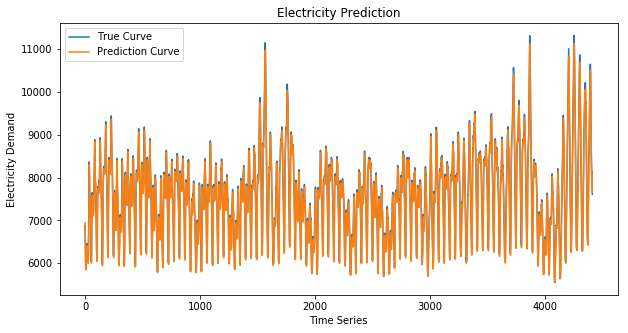

In [0]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='True Curve')
plt.plot(y_test_pred_nn3, label='Prediction Curve')
plt.title("Electricity Prediction")
plt.xlabel('Time Series')
plt.ylabel('Electricity Demand')
plt.legend()
plt.show()

### Long Short Term Memory

In [0]:
trainScalerDf = pd.DataFrame(train_scaler, columns=['Y'], index=train.index)
testScalerDf = pd.DataFrame(test_scaler, columns=['Y'], index=test.index)

trainScalerDf['X'] = trainScalerDf['Y'].shift()
testScalerDf['X'] = testScalerDf['Y'].shift()
    
trainX = trainScalerDf.dropna().drop('Y', axis=1)
trainY = trainScalerDf.dropna().drop('X', axis=1)
testX = testScalerDf.dropna().drop('Y', axis=1)
testY = testScalerDf.dropna().drop('X', axis=1)

trainX = trainX.values
trainY = trainY.values
testX = testX.values
testY = testY.values

In [0]:
x_train_lmse = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
x_test_lmse = testX.reshape(testX.shape[0], testX.shape[1], 1)

In [0]:
x_train_lmse.shape

(13103, 1, 1)

In [0]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, x_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse', optimizer='adam')
# early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(x_train_lmse, trainY, epochs=5, batch_size=32, verbose=1, shuffle=False)

Epoch 1/5
13103/13103 [==============================] - 2s 176us/step - loss: 0.0596
Epoch 2/5
13103/13103 [==============================] - 1s 69us/step - loss: 0.0181
Epoch 3/5
13103/13103 [==============================] - 1s 70us/step - loss: 0.0084
Epoch 4/5
13103/13103 [==============================] - 1s 67us/step - loss: 0.0056
Epoch 5/5
13103/13103 [==============================] - 1s 72us/step - loss: 0.0048


In [0]:
lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 8         
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_train_pred_lstm = lstm_model.predict(x_train_lmse)
y_pred_test_lstm = lstm_model.predict(x_test_lmse)

print("The R2 score of the Train dataset is:  {:0.3f}".format(r2_score(trainY, y_train_pred_lstm)))
print("The R2 score of the Test dataset is:  {:0.3f}".format(r2_score(testY, y_pred_test_lstm)))


The R2 score of the Train dataset is:  0.958
The R2 score of the Test dataset is:  0.971


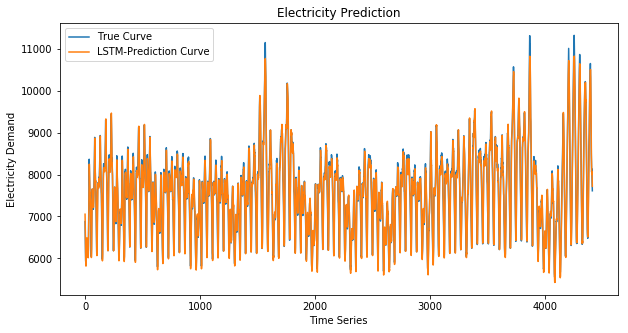

In [0]:
y_pred_test_lstm=scaler.inverse_transform(y_pred_test_lstm)
testY = scaler.inverse_transform(testY

plt.figure(figsize=(10, 5))
plt.plot(testY, label='True Curve')
plt.plot(y_pred_test_lstm, label='LSTM-Prediction Curve')
plt.title("Electricity Prediction")
plt.xlabel('Time Series')
plt.ylabel('Electricity Demand')
plt.legend()
plt.show()

#[Github Link](https://github.com/chris0906/UTS_ML2019_ID13016389)

# Introduction

Since the liberalization of the energy market introduced to  Australia in late 1990, the power supply market has become more dynamic compared to its past.The dynamic caused an increase in complexity for different parties involved in the electricity supply activity.  

For the Australian government, it's role is to maintain the stability of the market transactions and power supply in the long run. For electricity suppliers and retailers, they aim to maximize profits from electricity generating, transmitting, and distribution processes.  

There are lots of factors involved in their decision-making strategies. But one of the most important factors is how to predict the electricity demands accurately given a period.  

If the government can forecast electricity demands in a specific region correctly, it might reduce the chance of power outages by wisely schedule electricity generators. It protects economic activities.It also helps the government to achieve a dynamic balance between supply and demand.  

For electricity generators,there isn't an economical way to store electricity once be generated.Both overproduction and under production could lead to financial losses.They could reschedule their production strategy based on the predicted demands. For power transmission companies and retailers, they can use this information to reallocate their resources to maximize the profits.
  
Given the information above, we decided to conduct a project to build a model for electricity demand forecasting. 

# Exploration

## Dataset

The dataset we used was downloaded from the website of the Australian Energy Market Operator, which is an organization that manages the national electricity market. The dataset consists of 18-month electricity demand trend curve, which is 26208 lines of data. Each row indicates how many electricity has been used for 30 mins in a specific region in Australia with columns describing 'PRICE', 'SETTLEMENTDATE', 'TOTALEDEMAND', 'REGION' 'RRP'. In this dataset, we don't need as many columns as this dataset provides to us, we will process our data later on in the next section.

## Data pre-processing

We have stored our data in the Google drive; so we could pull our data and use it directly in the Google cloud platform to run our code. As we introduced before, our dataset consists of few columns, but the only two we need are our TOTALDEMAND and SETTLEMENTDATE, which means the amount of electricity used at that time point, as we are going to predict the amount of electricity demand for the next moment, and the moment could be quiet flexible to defined by ourselves.

### drop unneeded columns
```
data_18.drop(['REGION','RRP','PERIODTYPE'], axis=1, inplace=True)
data_19.drop(['REGION','RRP','PERIODTYPE'], axis=1, inplace=True)
```

### split the data
```
split_date = pd.Timestamp('2018-10-01 00:00:00')
split_date2 = pd.Timestamp('2018-10-01 00:30:00')
train = data_18.loc[:split_date]
test = data_18.loc[split_date2:]
```

### scale the data into small range
Because our data type range is enormous in the beginning, for example, the date type, this would make our operation and calculation slower. To optimize this thing, we use a scaler to scale all of our data in to the range of -1 to 1.
```
scaler = MinMaxScaler(feature_range=(-1, 1))
train_scaler = scaler.fit_transform(train)
test_scaler = scaler.transform(test)
```



# Methodology

The problem we are trying to solve is to predict electricity demand given historical data.  It is a time series analysis problem. And we only used one variable to predict the electricity demand. It narrows our problem to univariate time series forecasting. 

At the beginning stage of model selection, we choose a traditional method called ARMA.  This method combined two techniques which are autoregression and moving average. We put a lot of effort on data exploration when we tried to build ARMA. But we failed to make it work properly. 
After that, we turned our focus on machine learning method. It leads us to two models which are Neural Network and Long Short Term Memory(Deep learning model). And both models performed good results. 
In this section, we'll briefly introduce the methods we used for electricity demand forecasting.




## Statistical Method

In the beginning, we performed different size of rolling windows to plot the rolling mean and standard deviation. We used four different sizes of window. The result shows, with the increase of the window size, both rolling mean and standard deviation become smooth. We used the Augmented Dickey-Fuller test to prove the time series we got is stationary, which mean we could conduct time series analysis.  And then, we introduced an ARMA model from a  library called StatsModels. The model got a good result on in-sample data( RMSE = 109.7). But when it comes to predicting out-of-sample, the model failed to work correctly. So, we decided to use the neural network to perform the task.

## Machine Learning Method

We built three different neural networks. They are very similar. The main difference is we used a different number of layers and nodes in hidden layers.  

We selected Adam as the optimization algorithm to minimize our cost function and mean squared error to update the parameters of the model. From reults, we found the model's performance didn't see improvements, even the number of learnable parameters increased. We thought it is because of the model has already achieved a high fitting( r2_score > 0.96 ). The historical demands(training data) could well explain the output of the model (predicted data).

# Evaluation

For ARMA model, we used root mean square error to evaluate the model's performance. It represents how far the data point away from the regression line.

$$
\sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(y_{\text {test}}^{(i)}-\hat{y}_{\text {test}}^{(i)}\right)^{2}}=\sqrt{M S E{\text {test}}}= RM S E_{\text {test}}
$$

For neural network and LSTM models, we used R-squared measure since it is good at predicting continuous variables.

$$
\text{R}^{2}= 1 - \frac{\sum_{i=1}(\hat{y}^{(i)}-y^{(i)})^2}{\sum_{i=1}(\overline{y}-y^{(i)})^2}
$$

# Conclusion

We use the previous time point and the next time point to train our model, each point represents 30mins of electricity use. So the model is tailored to predict the next 30mins demand, which is not in line with our common expectation. To predict the next day of demand, we try to make our training process as the previous day to the next day mapping, in this case, we would get our next day prediction. Unfortunately, we only loaded 18 months' data, which means we only have approximately540 samples. It is completely not enough for our training process. 

In addition to that, we came up with another method to predict a whole day demand. To achieve that, we simply just predict our prediction again, because our model is designed to predict the next 30 mins, by predicting the result of the previous prediction again, we might be able to get a certain amount of period by doing this repetitively. This is our first thoughts, it turns out we failed, because, if we predict the previous prediction again, it will extend the previous trend irreversibly. 
As a result, one solution to improving our result is to apply the first method and train our model as much as we can at the same time.

# Ethical

We selected two machine learning models to predict electricity demands. The first metol is the artificial neural network. The second model is For our LSTM model; there are many situations in which it can be applied. For example, in the stock market, we could use this model to estimate the price for the next moment. But the stock market is a game; if a strategy can take effect at the moment, it will be removed quickly in a short period. As a consequence, some people probably would use this model to estimate price and end up losing big money, or earning money; either way, it is not a good practice in our real life.   

For neural network model, we may learn something wrong, and a good example is that when it comes to advertisement, it may show some ads to a specific group of users, this may lead to prejudice and discrimination. Another ethical issue that might happen to us is a moral actor; for example, an autonomous car at some emergencies may take choice for us as a moral actor. It's hard to judge whose responsibility it is.
Nevertheless, machine learning is our next megatrend; we shall take more social issues into account as we are progressing. In that way, it is not only for our technology progression, but also will benefit our generations.